Data Science Project: Developments in Homelessness in LA 2017-2019

In [24]:
import intake
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib as plt
%matplotlib inline

In [2]:
catalog = intake.open_catalog('homeless.yml') #reading in new YAML file with updated data
print(list(catalog))

['homeless_2017', 'homeless_2018', 'homeless_2019', 'homeless_shelters', 'la_city', 'la_county', 'council_districts', 'census_data']


In [3]:
one = catalog.homeless_2017.read()
two = catalog.homeless_2018.read()
three = catalog.homeless_2019.read()
shelters_raw = catalog.homeless_shelters.read()
county = catalog.la_county.read()
city = catalog.la_city.read()
council_districts = catalog.council_districts.read()

In [4]:
council_districts.head()

OBJECTID             NAME                 Effective Revised  District  \
0         1  Gilbert Cedillo  2013-07-01T00:00:00.000Z    None         1   
1         2   Paul Krekorian  2010-01-05T00:00:00.000Z    None         2   
2         3  Bob Blumenfield  2013-07-01T00:00:00.000Z    None         3   
3         4        David Ryu  2015-07-01T00:00:00.000Z    None         4   
4         5      Paul Koretz  2009-07-01T00:00:00.000Z    None         5   

            District_N                                      TOOLTIP  \
0  1 - Gilbert Cedillo  Councilmember: Gilbert Cedillo\nDistrict: 1   
1   2 - Paul Krekorian   Councilmember: Paul Krekorian\nDistrict: 2   
2  3 - Bob Blumenfield  Councilmember: Bob Blumenfield\nDistrict: 3   
3        4 - David Ryu        Councilmember: David Ryu\nDistrict: 4   
4      5 - Paul Koretz      Councilmember: Paul Koretz\nDistrict: 5   

                                   NLA_URL  \
0  https://cd1.lacity.org/?nla_win=p,75,75   
1  https://cd2.lacity.org/?nla_win=p,75,75   
2  https://cd3.lacity.org/?nla_win=p,75,75   
3  https://cd4.lacity.org/?nla_win=p,75,75   
4  https://cd5.lacity.org/?nla_win=p,75,75   

                                            geometry  
0  POLYGON ((-118.2685416990197 34.04664782118229...  
1  POLYGON ((-118.3373304535755 34.2210364164464,...  
2  POLYGON ((-118.5186081902342 34.20840589177175...  
3  POLYGON ((-118.4399891747833 34.17939989170961...  
4  POLYGON ((-118.5184931882622 34.18661788878557...

#### Looking at overall counts of homelessness per county district ####

In [5]:
districts_count_2017 = one['CD'].value_counts()
districts_count_2017

13    73
11    72
10    71
14    70
1     70
5     69
4     69
12    68
2     68
15    66
6     66
7     65
9     62
3     60
8     55
Name: CD, dtype: int64

In [6]:
districts_count_2018 = two['CD'].value_counts()
districts_count_2018

13    73
11    72
10    71
14    70
1     70
5     69
4     69
12    68
2     68
15    66
6     66
7     65
9     62
3     59
8     55
Name: CD, dtype: int64

In [7]:
districts_count_2019 = three['CD'].value_counts()
districts_count_2019

0     1159
13      73
11      72
10      71
1       70
14      70
5       69
4       69
12      68
2       68
15      66
6       66
7       65
9       62
3       60
8       55
Name: CD, dtype: int64

Note here: 1159 observations not associated with a district which doesn't seem right

Creating Geopandas dataframes

In [8]:
year_one = gpd.GeoDataFrame(one)
year_two = gpd.GeoDataFrame(two)
year_three = gpd.GeoDataFrame(three)
shelters = gpd.GeoDataFrame(shelters_raw)
la_county = gpd.GeoDataFrame(county)
la_city = gpd.GeoDataFrame(city)

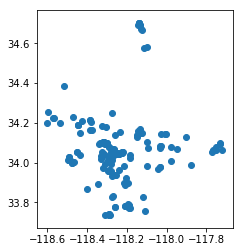

In [9]:
shelters.head()
shelters_filtered = shelters[shelters['latitude'] >=30]
shelters_filtered.plot()

#### Filtering datasets by County District ####

In [12]:
#Filtering datasets according to districts for 2017 and adding to an array
#While this does what I want it to, adding to an array doesn't let me call on certain dataframes like a dict would
districts_2017_array = []
for x in year_one['CD'].unique():
    d = year_one['CD']==x 
    f = year_one[d]
    districts_2017_array.append(f)

In [13]:
#Filtering datasets according to districts for 2017 and adding to a dictionary
#dictionary allows me to define items and actually call upon them within essentially what is the array
districts_2017 = {}
for x in year_one['CD'].unique():
    key = f"CD{x}"
    districts_2017[key] = year_one[year_one['CD'] == x]

districts_2017['CD14'].head()

FID   Tract  SPA  SD  CD  totUnshelt  totSheltPe  totPeople  \
357  358  181000    4   1  14      39.377           0     39.377   
358  359  181300    4   1  14      24.078           0     24.078   
359  360  181400    4   1  14      27.459           0     27.459   
360  361  181500    4   1  14       9.707           0      9.707   
361  362  181600    4   1  14       4.190           0      4.190   

       Shape__Are    Shape__Len  \
357  6.055568e+06  13931.638575   
358  2.105573e+06   7928.846168   
359  1.286524e+06   5315.104658   
360  1.601859e+06   6600.385031   
361  1.828884e+06   6616.752694   

                                              geometry  
357  POLYGON ((-118.198203188113 34.1516308693627, ...  
358  POLYGON ((-118.218663189899 34.1391168671658, ...  
359  POLYGON ((-118.201515187156 34.1395638681991, ...  
360  POLYGON ((-118.185899184417 34.1361878687157, ...  
361  POLYGON ((-118.201774186315 34.1329528674366, ...

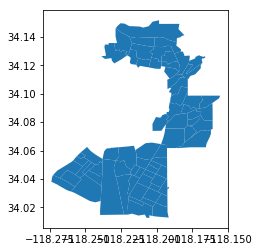

In [14]:
#Filtering datasets according to districts for 2018 and adding to a dictionary
districts_2018 = {}
for x in year_one['CD'].unique():
    key = f"CD{x}"
    districts_2018[key] = year_two[year_two['CD'] == x]

districts_2018['CD14'].plot()

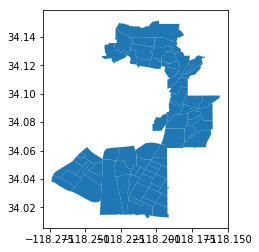

In [15]:
#Filtering datasets according to districts for 2019 and adding to a dictionary
districts_2019 = {}
for x in range(1, 16):
    key = f"CD{x}"
    districts_2019[key] = year_three[year_three['CD'] == x]

districts_2019['CD14'].plot()
#districts_2019

#### Plotting Percentage of Unsheltered vs Total Homeless

User Input for Council District Level of Homelessness in 2017

In [19]:
council_districts_boundaries = {}
for x in range(1, 16):
    key = f"CD{x}"
    council_districts_boundaries[key] = council_districts[council_districts['District'] == x]

Enter Council District Number: 14


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/opt/conda/lib/python3.7/site-packages/matplotlib/colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


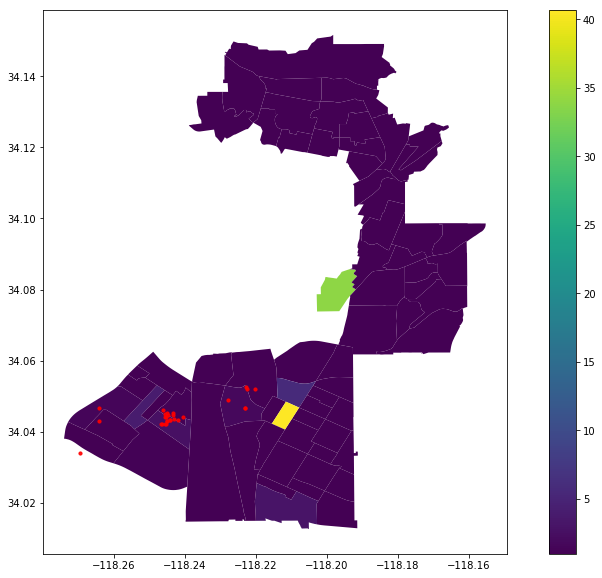

In [26]:
council = input ("Enter Council District Number:")
council_boundary = council_districts_boundaries['CD'+ council].iloc[0].geometry
council_shelters = shelters_filtered[shelters_filtered.geometry.within(council_boundary)]

unsheltered_CD_2017 = districts_2017['CD'+ council]
unsheltered_proportion_2017 = unsheltered_CD_2017['totPeople']/unsheltered_CD_2017['totUnshelt']
unsheltered_CD_2017['Percent_Unsheltered'] = unsheltered_proportion_2017

fig, ax = plt.subplots(figsize=(15, 10))
unsheltered_CD_2017.plot(column='Percent_Unsheltered',ax=ax, legend=True)
council_shelters.plot(ax=ax, color = 'red', alpha = 0.9, markersize = 10)

#### User Input for Council District Level of Homelessness in 2018 ####

Enter Council District Number: 14


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


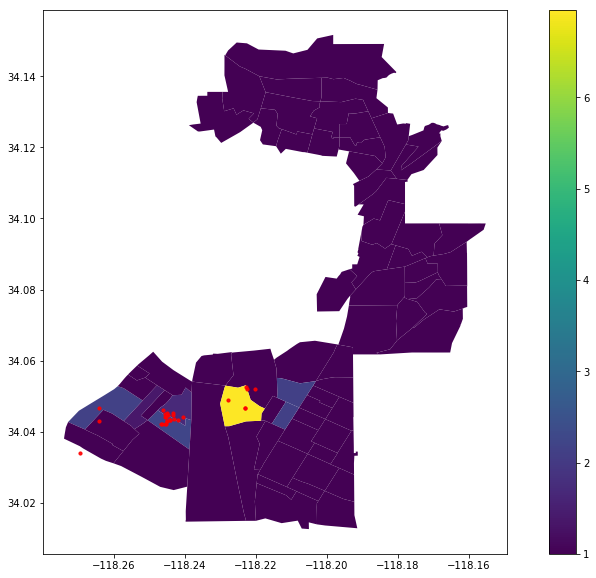

In [28]:
council = input ("Enter Council District Number:")
council_boundary = council_districts_boundaries['CD'+ council].iloc[0].geometry
council_shelters = shelters_filtered[shelters_filtered.geometry.within(council_boundary)]

unsheltered_CD_2018 = districts_2018['CD'+ council]
unsheltered_proportion_2018 = unsheltered_CD_2018['totPeople']/unsheltered_CD_2018['totUnshelt']
unsheltered_CD_2018['Percent_Unsheltered'] = unsheltered_proportion_2018

fig, ax = plt.subplots(figsize=(15, 10))
unsheltered_CD_2018.plot(column='Percent_Unsheltered',ax=ax, legend=True)
council_shelters.plot(ax=ax, color = 'red', alpha = 0.9, markersize = 10)

User Input for Council District Level of Homelessness in 2019

Enter Council District Number: 14


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


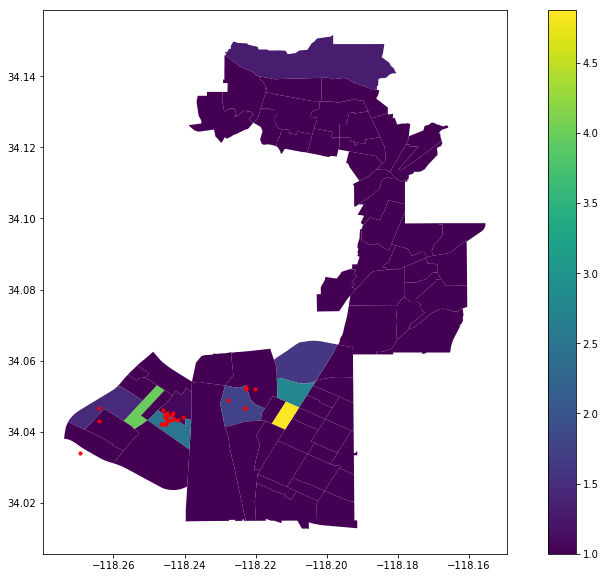

In [29]:
#Percentage unsheltered in relation to total homeless in 2019 for CD14
council = input ("Enter Council District Number:")
council_boundary = council_districts_boundaries['CD' + council].iloc[0].geometry
council_shelters = shelters_filtered[shelters_filtered.geometry.within(council_boundary)]

unsheltered_CD_2019 =districts_2019['CD' + council]
unsheltered_proportion_2019 = unsheltered_CD_2019['totPeopl_1']/unsheltered_CD_2019['totUnshe_1']
unsheltered_CD_2019['Percent_Unsheltered'] = unsheltered_proportion_2019

fig, ax = plt.subplots(figsize=(15, 10))
unsheltered_CD_2019.plot(column='Percent_Unsheltered',ax=ax, legend=True)
council_shelters.plot(ax=ax, color = 'red', alpha = 0.9, markersize = 10)

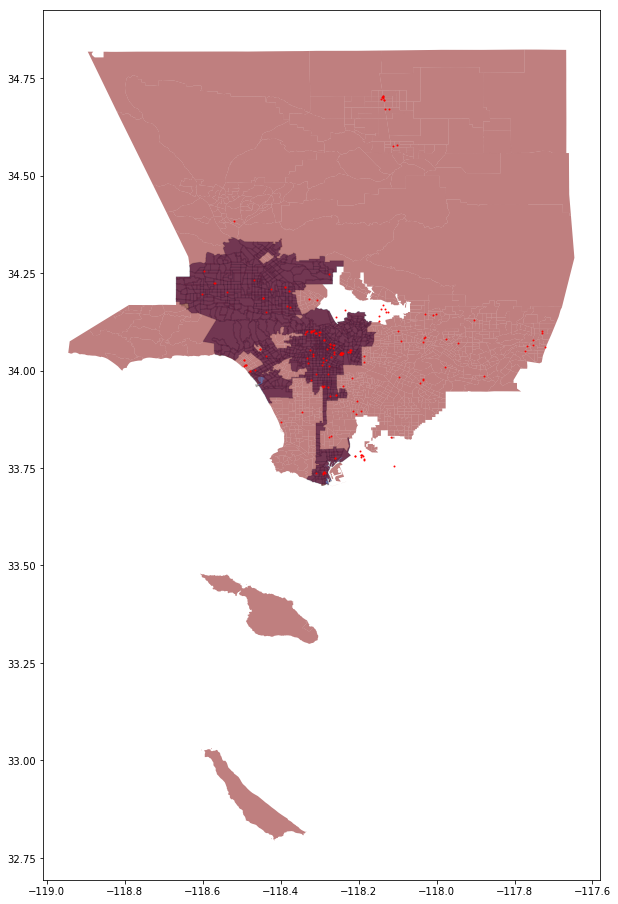

In [30]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, figsize=(16,16))
year_one.plot(ax=ax, color='darkgreen', alpha=0.2, linewidth=1, edgecolor='black')
year_two.plot(ax=ax, color='navy', alpha=0.5, linewidth=1)
year_three.plot(ax=ax, color='maroon', alpha=0.5, linewidth=1)
shelters_filtered.plot(ax=ax, color = 'red', alpha = 0.9, markersize = 1)

Merging census dataset with homelessness counts datasets to create percentage of homelessness within council districts as a whole

In [31]:
census_data = catalog.census_data.read()
census_data.head()

OBJECTID TRACTCE10   POP  LATPOP_D  WHIPOP_D  BLAPOP_D  AMIPOP_D  ASIPOP_D  \
0         1    101110  4731      1324      2656        83        24       580   
1         2    101122  3664       575      2437        34        18       578   
2         3    101210  5990      2219      2890       192        16       625   
3         4    101220  3363      1272      1662        45        25       335   
4         5    101300  4199       503      3190        47        26       402   

   HPIPOP_D  OTHPOP_D  ...  ASIVAP_D  HPIVAP_D  OTHVAP_D  MMRVAP_D  H0010001  \
0        15        37  ...       466        14        27         9      1734   
1         3        12  ...       481         2        10         7      1369   
2        16        15  ...       537        13        11        12      2317   
3         6         6  ...       270         6         4         7      1317   
4        10        10  ...       329         9         9         8      1582   

   H0010002  H0010003                                 TOOLTIP  \
0      1641        93  Tract: 1011.10\nTotal Population: 4731   
1      1325        44  Tract: 1011.22\nTotal Population: 3664   
2      2150       167  Tract: 1012.10\nTotal Population: 5990   
3      1246        71  Tract: 1012.20\nTotal Population: 3363   
4      1542        40  Tract: 1013.00\nTotal Population: 4199   

                                             NLA_URL  \
0  navigatela/reports/census_tracts_2010.cfm?PK=1...   
1  navigatela/reports/census_tracts_2010.cfm?PK=1...   
2  navigatela/reports/census_tracts_2010.cfm?PK=1...   
3  navigatela/reports/census_tracts_2010.cfm?PK=1...   
4  navigatela/reports/census_tracts_2010.cfm?PK=1...   

                                            geometry  
0  POLYGON ((-118.2942041566864 34.26289090945109...  
1  POLYGON ((-118.2899581573591 34.27813191171668...  
2  POLYGON ((-118.2921191550502 34.25071190884022...  
3  POLYGON ((-118.2794601523556 34.2475709084817,...  
4  POLYGON ((-118.2654201515742 34.25546591096638...  

[5 rows x 26 columns]

In [32]:
census_data['TRACTCE10']=census_data['TRACTCE10'].astype(int)

Merging Census Data with Homeless Population Data:

In [35]:
#2017
total_population_2017 = one.merge(census_data, left_on='Tract', right_on='TRACTCE10').set_geometry('geometry_y')

#2018
total_population_2018 = two.merge(census_data, left_on='Tract_N', right_on='TRACTCE10').set_geometry('geometry_y')

#2019
total_population_2019 = three.merge(census_data, left_on='Tract_N', right_on='TRACTCE10').set_geometry('geometry_y')

In [36]:
def percent_homeless (row):
    if row.POP <= 0 or row.totPeople > row.POP:
        return 0
    return (row.totPeople / row.POP)* 100

In [51]:
census_homeless_merged = {}
for x in range (1,4):
    key = f"Census_year{x}"
    census_homeless_merged[key] = total_population.apply(percent_homeless, axis=1)

In [46]:
total_population_2017['Percent_Unsheltered'] = census_homeless_merged['Census_year1']

In [48]:
total_population_2018['Percent_Unsheltered'] = census_homeless_merged['Census_year2']
total_population_2018.head()

OBJECTID_x  Tract_N  SPA  SD  CD  totUnshelt  totShelt  totPeople  \
0        1001   121210    2   3   6      43.585         0     43.585   
1        1002   197500    4   1   1      69.665         0     69.665   
2        1003   277200    5   2  11      15.870         0     15.870   
3           1   102104    2   5   2       0.000         0      0.000   
4           2   102105    2   5   2       7.502         0      7.502   

     Shape__Are   Shape__Len  ... HPIVAP_D OTHVAP_D  MMRVAP_D  H0010001  \
0  2.019286e+06  5613.334814  ...        2        1         4       799   
1  6.300110e+05  3168.760243  ...        1       15         8      1652   
2  1.053415e+06  4597.635618  ...       11       18        27      1134   
3  1.645062e+06  8228.428965  ...        5       10        14      1326   
4  4.889168e+05  3033.482362  ...        3        3         2       560   

   H0010002  H0010003                                 TOOLTIP  \
0       759        40  Tract: 1212.10\nTotal Population: 3122   
1      1499       153  Tract: 1975.00\nTotal Population: 3889   
2      1051        83  Tract: 2772.00\nTotal Population: 2490   
3      1279        47  Tract: 1021.04\nTotal Population: 3648   
4       527        33  Tract: 1021.05\nTotal Population: 1731   

                                             NLA_URL  \
0  navigatela/reports/census_tracts_2010.cfm?PK=1...   
1  navigatela/reports/census_tracts_2010.cfm?PK=1...   
2  navigatela/reports/census_tracts_2010.cfm?PK=2...   
3  navigatela/reports/census_tracts_2010.cfm?PK=1...   
4  navigatela/reports/census_tracts_2010.cfm?PK=1...   

                                          geometry_y  Percent_Unsheltered  
0  POLYGON ((-118.4097561734809 34.23340290001258...             0.000000  
1  POLYGON ((-118.2536561336576 34.0718588904225,...             0.000000  
2  POLYGON ((-118.3859321468701 33.94944487006192...             0.021137  
3  POLYGON ((-118.3433641621589 34.22587990322893...             0.000000  
4  POLYGON ((-118.3530821616933 34.20878490064121...             0.000000  

[5 rows x 39 columns]

In [37]:
#if (total_population['POP'] != 0 and total_population['totUnshelt'] >= 0):
percent_population_2017 = total_population_2017.apply(percent_homeless, axis=1)

In [38]:
total_population_2017['Percent_Unsheltered'] = percent_population_2017
#total_population['Percent_Unsheltered'].replace([np.inf, -np.inf], np.nan)
#total_population.replace([np.inf, -np.inf], np.nan).dropna(subset=["Percent_Unsheltered"], how="all")                 
#total_population['Percent_Unsheltered']=total_population['Percent_Unsheltered'].dropna()
total_population_2017.head()

FID   Tract  SPA  SD  CD  totUnshelt  totSheltPe  totPeople    Shape__Are  \
0    1  980024    2   3   6         253           0    253.647  1.213717e+07   
1    2  980026    2   5   7           0           0      0.000  2.039658e+07   
2    3  101110    2   5   7           1           0      1.000  1.676523e+06   
3    4  980028    5   4  11          36           0     36.004  2.528056e+07   
4    5  101122    2   5   7           0           0      0.000  3.880996e+06   

     Shape__Len  ... HPIVAP_D  OTHVAP_D  MMRVAP_D  H0010001  H0010002  \
0  17069.421843  ...        0         0         1        73        70   
1  37922.351769  ...        0         0         0         9         8   
2   5565.411357  ...       14        27         9      1734      1641   
3  30401.199460  ...        0         0         0         1         1   
4  11695.304293  ...        2        10         7      1369      1325   

   H0010003                                 TOOLTIP  \
0         3   Tract: 9800.24\nTotal Population: 186   
1         1    Tract: 9800.26\nTotal Population: 20   
2        93  Tract: 1011.10\nTotal Population: 4731   
3         0     Tract: 9800.28\nTotal Population: 4   
4        44  Tract: 1011.22\nTotal Population: 3664   

                                             NLA_URL  \
0  navigatela/reports/census_tracts_2010.cfm?PK=9...   
1  navigatela/reports/census_tracts_2010.cfm?PK=9...   
2  navigatela/reports/census_tracts_2010.cfm?PK=1...   
3  navigatela/reports/census_tracts_2010.cfm?PK=9...   
4  navigatela/reports/census_tracts_2010.cfm?PK=1...   

                                          geometry_y  Percent_Unsheltered  
0  POLYGON ((-118.4902061838226 34.18663989018383...             0.000000  
1  POLYGON ((-118.2863301573649 34.29177091376295...             0.000000  
2  POLYGON ((-118.2942041566864 34.26289090945109...             0.021137  
3  POLYGON ((-118.4294591512868 33.91632286359522...             0.000000  
4  POLYGON ((-118.2899581573591 34.27813191171668...             0.000000  

[5 rows x 38 columns]

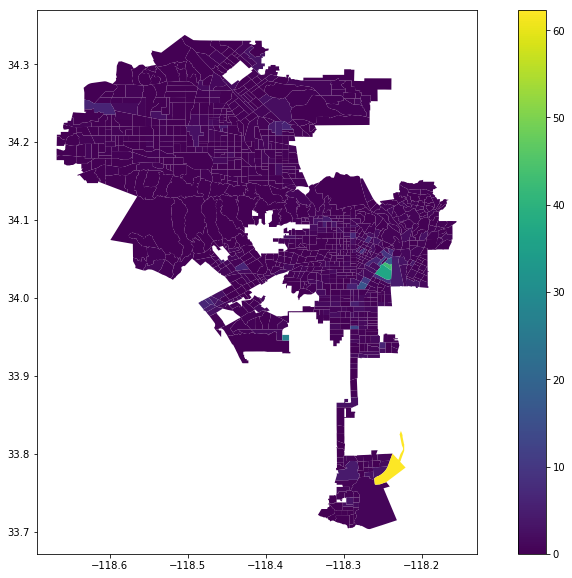

In [422]:
fig, ax = plt.subplots(figsize=(15, 10))
total_population.plot('Percent_Unsheltered',ax=ax, legend=True)